## `NETWORK INTRUSION`

AIM is to build binary network intrusion detection system to detect anamolies and attacks in the network.

### `ENVIRONMENT SETUP`

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 150)

### `DATA LOAD`

In [2]:
train = pd.read_csv('Train.csv', header= None)
test = pd.read_csv('Test.csv', header= None)

In [3]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
 "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
 "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", 
 "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count",
 "dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", 
 "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate",
 "dst_host_srv_rerror_rate","attack", "last_flag"]

In [4]:
train.columns = columns
test.columns = columns

### `DATA STRUCUTRE`

In [5]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [7]:
train.shape

(125973, 43)

In [8]:
test.shape

(22544, 43)

In [9]:
test.drop_duplicates(inplace=True)
train.drop_duplicates(inplace=True)

### `MAGICAL VALUES IN NUMERIC FEATURES`

In [10]:
# Magical values in train
mask_magic = train.select_dtypes(['float64', 'int64']).columns.values

misc = pd.DataFrame(columns=['feature', 'neg'])

i = 0

for x in mask_magic:
    a = (train[x] < 0).sum()
    misc.loc[i] = [x, a]
    i += 1

misc[misc.neg > 0]

,feature,neg


### `MISSING VALUES`

In [11]:
# Missing values in test
for x in train.columns:
    if train[x].isnull().sum() > 0:
        print(f'Feature Name: {x}   \t%Missing: {np.round((train[x].isnull().sum()/ len(train.index))*100,2)}')

### `NEW FEATURES`

In [12]:
# Creating attack feature
train['attack_flag'] = train.attack.apply(lambda x: 0 if x == 'normal' else 1)

# Creating boolean attack feature
test['attack_flag'] = test.attack.apply(lambda x: 0 if x == 'normal' else 1)

# Drop attack features
train.drop('attack', axis=1, inplace=True)
test.drop('attack', axis=1, inplace=True)

# Making boolean feature
train['attack_flag'] = train.attack_flag.astype('uint64')
test['attack_flag'] = test.attack_flag.astype('uint64')

### `ATTACK INSTANCES IN DATASET`

In [13]:
# Attack rate in the given dataset
print(f'% of attack instances in Train data are: {np.round(((train.attack_flag == 1).sum()/len(train))*100, 2)}%')
print(f'% of attack instances in Test data are: {np.round(((test.attack_flag == 1).sum()/len(test))*100, 2)}%')

% of attack instances in Train data are: 46.54%
% of attack instances in Test data are: 56.92%


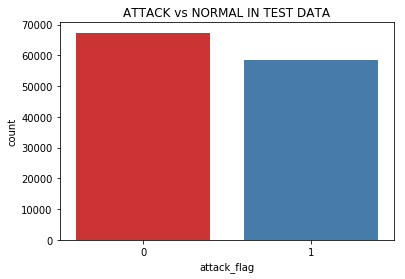

In [14]:
%matplotlib inline 

plt.title("ATTACK vs NORMAL IN TEST DATA")
sns.countplot(train.attack_flag, palette="Set1");

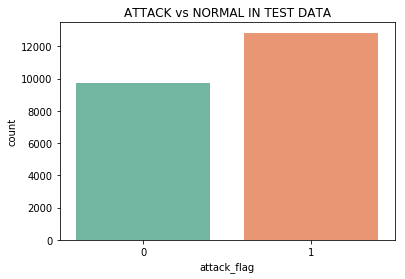

In [15]:
plt.title("ATTACK vs NORMAL IN TEST DATA")
sns.countplot(test.attack_flag, palette="Set2");

### `ENCODING`

In [16]:
from sklearn.preprocessing import LabelEncoder

# label encoder for protocol_type
protocol_en = LabelEncoder()
protocol_en.fit(train.protocol_type.unique())
train['protocol_type'] = protocol_en.transform(train.protocol_type)
test['protocol_type'] = protocol_en.transform(test.protocol_type)

# label encoder for service
service_en = LabelEncoder()
service_en.fit(train.service.unique())
train['service'] = service_en.transform(train.service)
test['service'] = service_en.transform(test.service)

# label encoder for flag
flag_en = LabelEncoder()
flag_en.fit(train.flag.unique())
train['flag'] = flag_en.transform(train.flag)
test['flag'] = flag_en.transform(test.flag)

### `CATEGORICAL FEATURES`

In [17]:
cat_features = ['protocol_type', 'service', 'flag']

train[cat_features] = train[cat_features].astype('category')
test[cat_features] = test[cat_features].astype('category')

### `CHECKING LEVELS IN CATEGORICAL FEATURES`

In [18]:
for x in cat_features:
    print('*'*55)
    print()
    print(f'No of unique values for {x} in train data: {len(train[x].unique())}')
    print(f'No of unique values for {x} in test data: {len(test[x].unique())}')
    print()
    
print('*'*55)

*******************************************************

No of unique values for protocol_type in train data: 3
No of unique values for protocol_type in test data: 3

*******************************************************

No of unique values for service in train data: 70
No of unique values for service in test data: 64

*******************************************************

No of unique values for flag in train data: 11
No of unique values for flag in test data: 11

*******************************************************


In [19]:
# Values missing in test dataset
s_test = test.service.unique()
s_train = train.service.unique()

ls = list()
for x in s_train:
    if x not in s_test:
        print(x)

50
64
27
3
25
22


### `SCALING NUMERIC FEATURES`

In [20]:
from sklearn.preprocessing import StandardScaler

nmask = train.select_dtypes(['float64', 'int64']).columns.values 

if len(nmask) > 0:
    sc = StandardScaler()
    
    print("Scaling numeric features....")
    
    # Scaling numeric features
    train_norm = sc.fit_transform(train[nmask])
    train[nmask] = train_norm

    # Scaling test data
    test_norm = sc.transform(test[nmask])
    test[nmask] = test_norm

Scaling numeric features....


### `FEATURE SELECTION`

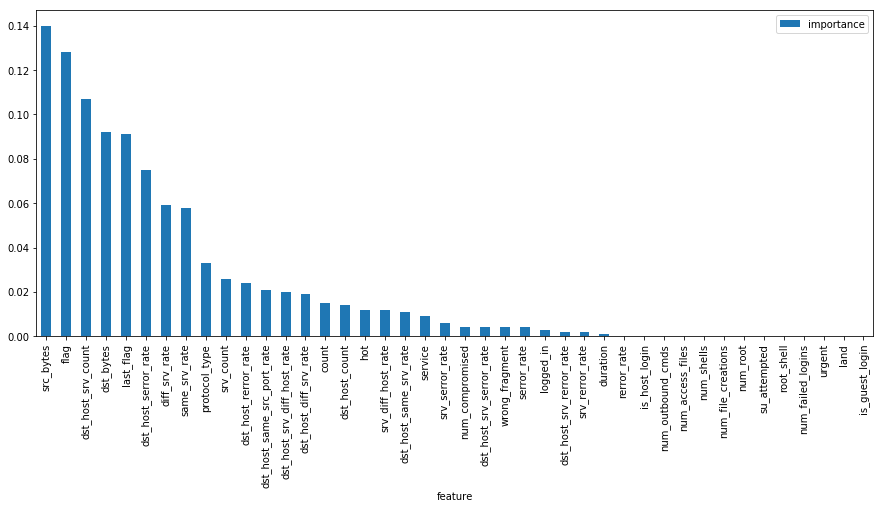

In [21]:
from sklearn.ensemble import RandomForestClassifier

samplecols = train.drop(['attack_flag'], axis=1).columns.values
X = train.drop(['attack_flag'], axis=1)
y = train.attack_flag

rfc = RandomForestClassifier(random_state=11, criterion='entropy');

# fit random forest classifier on the training set
rfc.fit(X, y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':samplecols ,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances

# plot importances
plt.rcParams['figure.figsize'] = (15, 6)
importances.plot.bar();

In [22]:
selected_features = importances[importances.importance > 0].index.values

In [23]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
# import itertools

# samplecols = train.drop(['attack_flag'], axis=1).columns.values
# rfc = RandomForestClassifier(random_state=11)

# # create the RFE model and select 10 attributes
# rfe = RFE(rfc, n_features_to_select=15)
# rfe = rfe.fit(X, y)

# # summarize the selection of the attributes
# feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), samplecols)]
# selected_features = [v for i, v in feature_map if i==True]
# selected_features

In [24]:
# updating train df
train_imp = train[selected_features]
train_imp['attack_flag'] = train.attack_flag
train = train_imp

# Updating test df
test_imp = test[selected_features]
test_imp['attack_flag'] = test.attack_flag
test = test_imp

### `DUMMY FEATURES`

In [25]:
# Any categorical features in important features?
for x in cat_features:
    if x in selected_features:

        print(x)

protocol_type
service
flag


In [26]:
print("************ Service ************")
print('Unique values in train data:', len(train.service.unique()))
print('Unique values in train data:', len(test.service.unique()))
print()
print("********* protocol_type ********")
print('Unique values in train data:', len(train.protocol_type.unique()))
print('Unique values in train data:', len(test.protocol_type.unique()))
print()
print("************* flag *************")
print('Unique values in train data:', len(train.flag.unique()))
print('Unique values in train data:', len(test.flag.unique()))

************ Service ************
Unique values in train data: 70
Unique values in train data: 64

********* protocol_type ********
Unique values in train data: 3
Unique values in train data: 3

************* flag *************
Unique values in train data: 11
Unique values in train data: 11


In [27]:
train_dummy = pd.get_dummies(train, drop_first=True, columns=['service', 'protocol_type', 'flag'])
test_dummy =  pd.get_dummies(test, drop_first=True, columns=['service', 'protocol_type', 'flag'])

In [28]:
train_col = train_dummy.columns.values
test_col = test_dummy.columns.values

In [29]:
delcol = list()
for x in train_col:
    if x not in test_col:
        delcol.append(x)
        
delcol

['service_3',
 'service_22',
 'service_25',
 'service_27',
 'service_50',
 'service_64']

In [30]:
# Drop extra columns
train_dummy.drop(delcol, axis=1, inplace=True)

### `DECOMPOSITION - PCA`

In [31]:
import prince

X = train.drop('attack_flag', axis=1)

famd = prince.PCA(n_components=10, random_state=11,)
famd = famd.fit(X)

# Creating df with principal components
pca_df = pd.DataFrame(columns=['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10'], data=famd.U_)

pca_df['attack_flag'] = train_dummy.attack_flag
pca_df.head()

# Explained variance
np.sum(famd.explained_inertia_)

0.7925594832316183

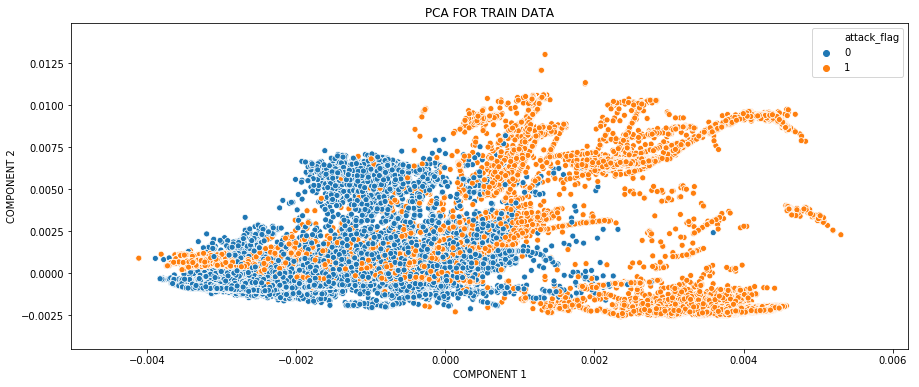

In [32]:
sns.scatterplot(x='c1', y='c2', data=pca_df, hue='attack_flag');
plt.title('PCA FOR TRAIN DATA');
plt.xlabel('COMPONENT 1');
plt.ylabel('COMPONENT 2');

In [33]:
X_test = test.drop('attack_flag', axis=1)

famd = prince.PCA(n_components=10, random_state=11)
famd = famd.fit(X_test)

# Creating df with principal components
pcat_df = pd.DataFrame(columns=['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10'], data=famd.U_)

pcat_df['attack_flag'] = test_dummy.attack_flag
pcat_df.head()

# Explained variance
np.sum(famd.explained_inertia_)

0.7714967144913658

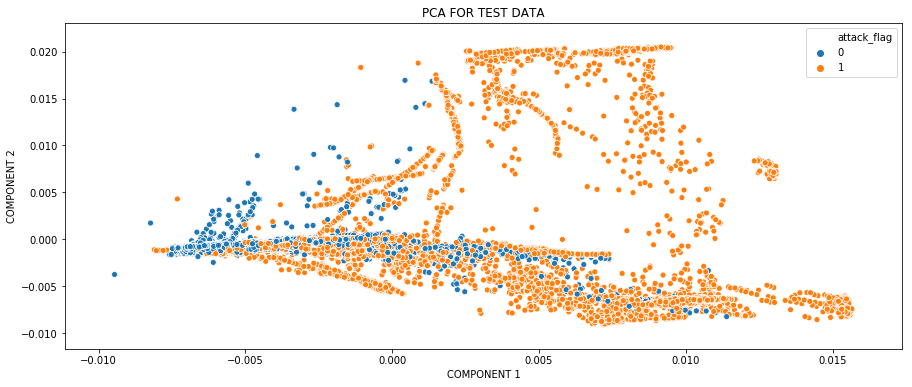

In [34]:
sns.scatterplot(x='c1', y='c2', data=pcat_df, hue='attack_flag');
plt.title('PCA FOR TEST DATA');
plt.xlabel('COMPONENT 1');
plt.ylabel('COMPONENT 2');

### `TRAIN TEST SPLIT`

In [35]:
from sklearn.model_selection import train_test_split

# Data for binary classification
X = train_dummy.drop('attack_flag', axis=1)
y = train_dummy.attack_flag


# Train Test split for Binary Classfication
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# `MODELS FOR BINARY CLASSIFICATION`

********************** Results **********************
DecisionTreeClassifier
Recall: 99.8546%
Precision: 99.8717%
Time taken by DecisionTreeClassifier Classifier: 0:00:00.543576
RandomForestClassifier
Recall: 99.9059%
Precision: 99.9230%
Time taken by RandomForestClassifier Classifier: 0:00:02.352710
KNeighborsClassifier
Recall: 99.9059%
Precision: 99.8888%
Time taken by KNeighborsClassifier Classifier: 0:01:01.769864
LogisticRegression
Recall: 99.2645%
Precision: 98.3976%
Time taken by LogisticRegression Classifier: 0:00:02.742699


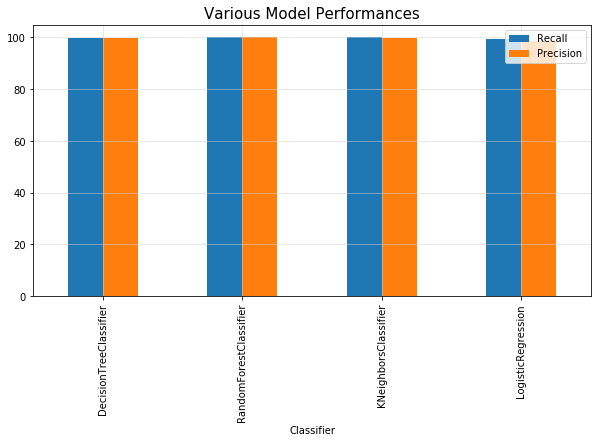

In [36]:
from sklearn.metrics import accuracy_score, log_loss, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import datetime

from sklearn.utils import class_weight

classifiers = [DecisionTreeClassifier(max_features = 0.7, random_state=11, class_weight='balanced'),
               RandomForestClassifier(max_features = 0.7, random_state=11, criterion='entropy', class_weight='balanced'),
               KNeighborsClassifier(n_neighbors=5, weights='distance'),
               LogisticRegression(class_weight='balanced', random_state=11)]

# Logging for Visual Comparison
log_cols=["Classifier", "Recall", "Precision"]
log = pd.DataFrame(columns=log_cols)

print('********************** Results **********************')
for clf in classifiers:
    # logging start time
    start = datetime.datetime.now()
    
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*70)
    print(name)
    
    train_predictions = clf.predict(x_test)
    recall = recall_score(y_test, train_predictions, average='binary')
    pre = precision_score(y_test, train_predictions, average='binary')
    print("Recall: {:.4%}".format(recall))
    print("Precision: {:.4%}".format(pre))
    
    end = datetime.datetime.now()
    
    print(f'Time taken by {name} Classifier: {end-start}')
    
    # Appending to the dataframe
    log_entry = pd.DataFrame([[name, recall*100, pre*100]], columns=log_cols)
    log = log.append(log_entry)
    
    
print("="*70)

# Various models performance plot
log.set_index('Classifier', inplace=True)

plt.rcParams['figure.figsize'] = (10, 5)
plot = log[['Recall', 'Precision']].plot(kind="bar");
plot.set_title("Various Model Performances", fontsize=15);
plot.grid(color='lightgray', alpha=0.6);

### `SELECTED MODEL EVALUATION`

In [37]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(max_features = 0.6, random_state=11, criterion='gini', class_weight='balanced')
dt = DecisionTreeClassifier(max_features = 0.7, random_state=11, criterion='gini', class_weight='balanced')
lr = LogisticRegression(class_weight='balanced', random_state=11, penalty='l2')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')


#  Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('RandomForest', rf),
#                   ('DT', dt),
                 ('KNN', knn),
                 ('LR', lr)]

v =  VotingClassifier(estimators = combined_model, voting = 'soft')

v.fit(x_train, y_train)

VotingClassifier(estimators=[('RandomForest', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=0.6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_sp..., penalty='l2', random_state=11,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

************************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13503
           1       1.00      1.00      1.00     11692

   micro avg       1.00      1.00      1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

************************************************************



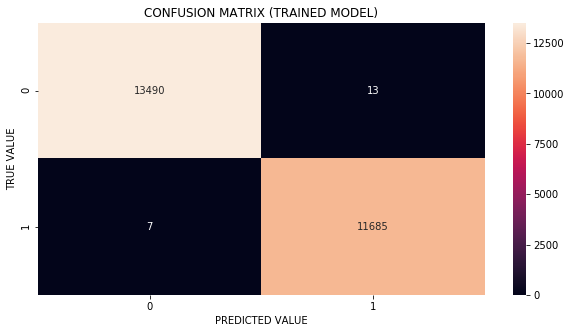

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('*'*60)
print()
print(classification_report(y_test, v.predict(x_test)))
print('*'*60)

print()

cm = confusion_matrix(y_test, v.predict(x_test))

# Plotting confusion matrix
plt.title('CONFUSION MATRIX (TRAINED MODEL)')
sns.heatmap(cm, annot=True, fmt='g');
plt.xlabel('PREDICTED VALUE');
plt.ylabel('TRUE VALUE');

# `MAKING PREDICTIONS ON GIVEN TEST DATASET`

************************************************************
--------------- CLASSIFICATION REPORT ---------------

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      9711
           1       0.97      0.76      0.85     12833

   micro avg       0.85      0.85      0.85     22544
   macro avg       0.86      0.87      0.85     22544
weighted avg       0.88      0.85      0.85     22544

************************************************************


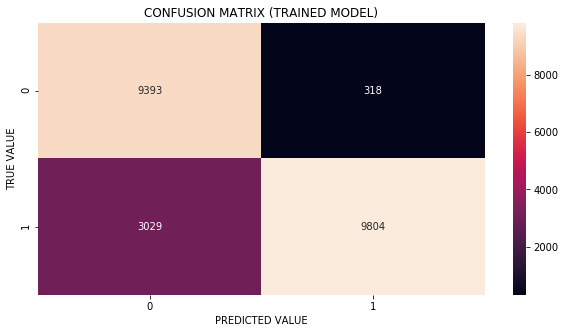

In [39]:
X_test = test_dummy.drop('attack_flag', axis=1)
Y_test = test_dummy.attack_flag

print('*'*60)
print('--------------- CLASSIFICATION REPORT ---------------')
print()
print(classification_report(Y_test, v.predict(X_test)))
print('*'*60)

cmt = confusion_matrix(Y_test, v.predict(X_test))

# Plotting confusion matrix
plt.title('CONFUSION MATRIX (TRAINED MODEL)')
sns.heatmap(cmt, annot=True, fmt='g');
plt.xlabel('PREDICTED VALUE');
plt.ylabel('TRUE VALUE');